In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataframe=pd.read_csv("50_Startups.csv")

In [3]:
dataframe.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
X=dataframe.iloc[:,:4].values
Y=dataframe.iloc[:,-1].values

In [6]:
from sklearn.linear_model import LinearRegression

In [13]:
import sklearn
dir(sklearn)

['_BUILT_WITH_MESON',
 '__SKLEARN_SETUP__',
 '__all__',
 '__builtins__',
 '__cached__',
 '__check_build',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_built_with_meson',
 '_config',
 '_distributor_init',
 '_loss',
 'base',
 'clone',
 'config_context',
 'exceptions',
 'externals',
 'get_config',
 'linear_model',
 'logger',
 'logging',
 'metrics',
 'model_selection',
 'os',
 'preprocessing',
 'random',
 'set_config',
 'setup_module',
 'show_versions',
 'sklearn',
 'svm',
 'sys',
 'utils']

In [15]:
dir(sklearn.preprocessing)

['Binarizer',
 'FunctionTransformer',
 'KBinsDiscretizer',
 'KernelCenterer',
 'LabelBinarizer',
 'LabelEncoder',
 'MaxAbsScaler',
 'MinMaxScaler',
 'MultiLabelBinarizer',
 'Normalizer',
 'OneHotEncoder',
 'OrdinalEncoder',
 'PolynomialFeatures',
 'PowerTransformer',
 'QuantileTransformer',
 'RobustScaler',
 'SplineTransformer',
 'StandardScaler',
 'TargetEncoder',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_csr_polynomial_expansion',
 '_data',
 '_discretization',
 '_encoders',
 '_function_transformer',
 '_label',
 '_polynomial',
 '_target_encoder',
 '_target_encoder_fast',
 'add_dummy_feature',
 'binarize',
 'label_binarize',
 'maxabs_scale',
 'minmax_scale',
 'normalize',
 'power_transform',
 'quantile_transform',
 'robust_scale',
 'scale']

In [16]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [18]:
ct=ColumnTransformer(transformers=[("Encoding",OneHotEncoder(),[3])],remainder="passthrough")
X=np.array(ct.fit_transform(X))

In [20]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.25)   

In [21]:
reg=LinearRegression()
reg.fit(xtrain,ytrain)

LinearRegression()

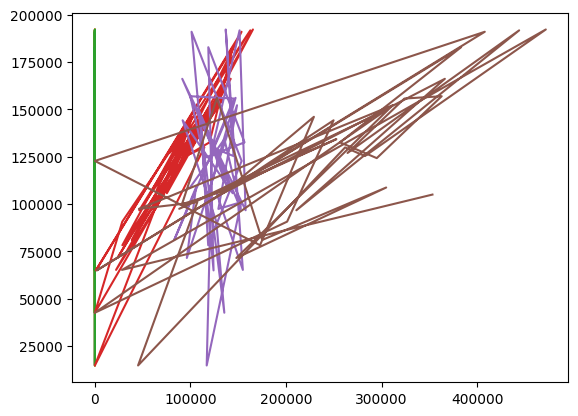

In [23]:
plt.plot(xtrain,ytrain)

In [24]:
ypred=reg.predict(xtest)

In [26]:
df=pd.DataFrame({'Real Value':ytest ,"Predicted Values":ypred})

In [27]:
df

,Real Value,Predicted Values
0,49490.75,56574.577985
1,77798.83,74372.481098
2,96479.51,89573.262841
3,69758.98,59293.446431
4,118474.03,116638.903544
5,35673.41,47617.297236
6,111313.02,117063.740852
7,96778.92,97620.762619
8,81229.06,68693.813699
9,141585.52,128919.137098


In [29]:
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(ytest,ypred)))

7540.258479267735
